In [1]:
import numpy
import pandas
import random

In [2]:
df = pandas.read_csv('beijing_17_18_meo.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.isnull().any()

In [ ]:
df[df.isnull().values==True]

In [ ]:
df.drop_duplicates()

以上结果看出，在beijing_17_18_meo.csv中没有重复的数据

In [13]:
df.dtypes

station_id         object
longitude         float64
latitude          float64
utc_time           object
temperature       float64
pressure          float64
humidity            int64
wind_direction    float64
wind_speed        float64
weather            object
dtype: object

对wind_direction和wind_speed的NaN进行填充

In [3]:
new_df = df.fillna(999999)

In [4]:
dirty_data = new_df.loc[new_df['wind_direction']==999017, 'wind_speed']
dirty_data.value_counts()

0.0    2205
0.2    1863
0.1    1496
Name: wind_speed, dtype: int64

wind_direction范围是0--360，不在这个范围内的用生成的随机数(0--360)代替

In [5]:
def clean_wind_direction(x):
    if x > 360:
        return random.randint(0, 360)
    return x

def clean_wind_speed(x):
    if x > 16:
        return random.randint(0, 16)
    return x

def clean_temperature(x):
    if x > 40 or x < -20:
        return random.randint(-20, 40)
    return x

def clean_pressure(x):
    if x > 1040 or x < 990:
        return random.randint(990, 1040)
    return x

def clean_humidity(x):
    if x > 100 or x < 0:
        return random.randint(0, 100)
    return x

In [6]:
new_df['wind_direction'] = new_df.wind_direction.apply(clean_wind_direction)

In [7]:
new_df.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000
mean,116.395672,40.047275,38.182775,1026.798200,354.312894,176.491733,1577.361118
std,0.395223,0.264798,5030.694816,5025.748455,17423.723518,106.320000,39661.057103
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,75.000000,0.900000
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,184.000000,1.500000
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,266.000000,2.500000
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,360.000000,999999.000000


In [8]:
dirty_data = new_df.loc[new_df['wind_speed']>15, 'wind_speed']
dirty_data.value_counts()

999999.0    249
15.4          1
Name: wind_speed, dtype: int64

wind_speed范围是0--16，不在这个范围内的用生成的随机数(0--16)代替

In [9]:
new_df['wind_speed'] = new_df.wind_speed.apply(clean_wind_speed)

In [10]:
new_df['temperature'] = new_df.temperature.apply(clean_temperature)
new_df['pressure'] = new_df.pressure.apply(clean_pressure)
new_df['humidity'] = new_df.humidity.apply(clean_humidity)

In [11]:
new_df.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000
mean,116.395672,40.047275,12.874187,1011.671430,50.621543,176.491733,1.894814
std,0.395223,0.264798,12.079287,11.606183,26.053929,106.320000,1.395240
min,115.692222,39.718611,-20.000000,990.000000,3.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,1002.100000,27.000000,75.000000,0.900000
50%,116.290556,39.973889,13.800000,1011.200000,48.000000,184.000000,1.500000
75%,116.626944,40.223333,23.200000,1020.400000,73.000000,266.000000,2.500000
max,117.117778,40.658889,39.900000,1040.000000,100.000000,360.000000,16.000000


保存到新的csv文件

In [12]:
new_df.to_csv('beijing_17_18_meo_cleaned.csv', index=False)

# 数据可视化

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1、查看单列数据的分布情况

In [14]:
meoData = pd.read_csv('beijing_17_18_meo_cleaned.csv')

In [15]:
chaoyangData = pd.DataFrame(meoData[meoData.station_id=='chaoyang_meo'])

In [16]:
col_temperature = chaoyangData['temperature']

c:\bbbbbbing\mypython\kddcup\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


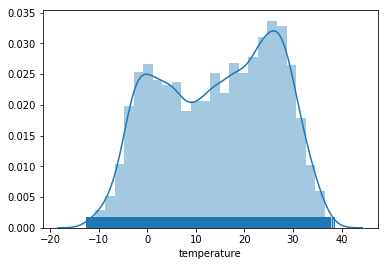

In [17]:
sns.distplot(col_temperature, rug=True)

由上图可以看出，温度主要分布在-20--40度，因此对于温度脏数据可以取-20--40度的随机值

c:\bbbbbbing\mypython\kddcup\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


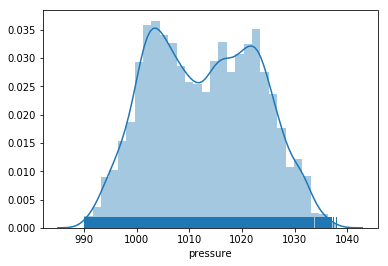

In [18]:
col_pressure = chaoyangData['pressure']
sns.distplot(col_pressure, rug=True)

由上图可以看出，气压主要分布在990--1040，因此对于气压脏数据可以取990--1040的随机值

c:\bbbbbbing\mypython\kddcup\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


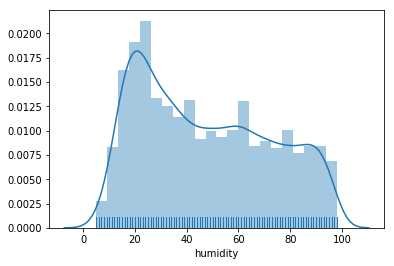

In [19]:
col_humidity = chaoyangData['humidity']
sns.distplot(col_humidity, rug=True)

由上图可以看出,湿度百分比分布在0--100,因此对于湿度百分比脏数据可以取0--100的随机值

c:\bbbbbbing\mypython\kddcup\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


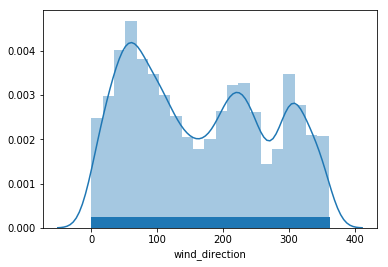

In [20]:
col_wind_direction = chaoyangData['wind_direction']
sns.distplot(col_wind_direction, rug=True)

c:\bbbbbbing\mypython\kddcup\venv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


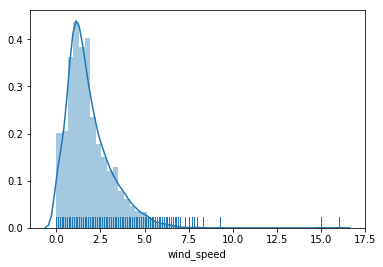

In [21]:
col_wind_speed = chaoyangData['wind_speed']
sns.distplot(col_wind_speed, rug=True)